<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/NNLayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ডিপ লার্নিং দিয়ে প্রথম নিউরাল নেটওয়ার্ক 

প্রথম নিউরাল নেটওয়ার্ক, আমাদের মেশিন লার্নিং মডেলে। চেষ্টা করছি ব্যাপারটাকে খুবই সাধারণ রাখার জন্য, বিশেষ করে ''কনসেপ্ট হেভি এবং কোড লাইট'' সিস্টেমে। আমরা চেষ্টা করবো আপনার কনসেপ্ট যাতে ঠিকমত দাঁড়ায়, কারণ কোড এখন পুরো ইন্টারনেট জুড়ে। এমনকি গুগল কোলাবে হাজার হাজার কোড স্নিপেট দেয়া আছে পাশাপাশি। একদম ভয় পাবার কিছু নেই। 


## নামপাই কম্প্যাটিবিলিটি

আমাদের কাজের সুবিধার জন্য টেনসর ফ্লো’র টেনসর এবং নামপাই এন ডি অ্যারেগুলোর নিজেদের মধ্যে ‘কনভারশন’ অনেকটাই সোজা। টেনসর ফ্লো অপারেশনগুলো স্বয়ংক্রিয়ভাবে কনভার্ট করে নামপাই এন ডি অ্যারেকে টেনসরে। আবার নামপাই অপারেশনগুলোকে একইভাবে টেনসর থেকে কনভার্ট করে নামপাই এন ডি অ্যারেতে।


শুরুতেই ইম্পোর্ট করছি বেশ কিছু লাইব্রেরি। টেনসর ফ্লো তো থাকছেই, সঙ্গে নামপাই। 

In [1]:
# টেনসর ফ্লো, কেরাস আর কিছু হেল্পার লাইব্রেরি 
# নামপাই তো থাকবেই 

import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

1.13.1


## একটা লিনিয়ার রিগ্রেশন সমস্যা 

দুটো নামপাই অ্যারে ''ইনিশিয়ালাইজ'' করছি নিচের একুয়েশনের ভিত্তিতে। 

y = 2x + 30

## তৈরি করি ট্রেনিং ডেটা 

এখানে প্রথম অ্যারে 'xs' ইনপুট ভ্যালুতে এ আমরা -১০, ০, ২, ৬, ১২, ১৫ দেয়ার পর y = 2x + 30 তার কর্রেসপন্ডিং 'ys' পেয়ে গিয়েছি আউটপুট ভ্যালু হিসেবে। প্রতিটা 'xs' এর কর্রেসপন্ডিং ভ্যালু দিয়ে দিয়েছি আমাদের একুয়েশন থেকে। 

এরপর একটা ''ফর লুপ'' চালালাম দুটো ভ্যালুকে পাশাপাশি দেখাতে। 

In [4]:
xs = np.array([-10, 0, 2, 6, 12, 15], dtype=float)
ys = np.array([10, 30, 34, 42, 54, 60], dtype=float)

for i,x in enumerate(xs):
  print("X: {} Y: {}".format(x, ys[i]))

X: -10.0 Y: 10.0
X: 0.0 Y: 30.0
X: 2.0 Y: 34.0
X: 6.0 Y: 42.0
X: 12.0 Y: 54.0
X: 15.0 Y: 60.0


## লিনিয়ার রিগ্রেশন একুয়েশনটা দেখি ভিজ্যুয়ালি 

আমাদের ম্যাটপ্লটলিব দিয়ে এই লিনিয়ার রিগ্রেশনটা 'y = 2x + 30' দেখি গ্রাফ আকারে 

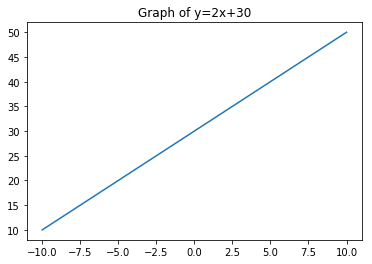

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
plt.title('Graph of y=2x+30')
plt.plot(x, x*2+30);

## প্রথম নিউরাল নেটওয়ার্ক তৈরি 

চলুন তৈরি করে ফেলি আমাদের প্রথম নিউরাল নেটওয়ার্ক মডেল। পৃথিবীর সবচেয়ে সোজা মডেল হবে এটা, এটাকে আমরা বলছি ‘ডেন্স’ নেটওয়ার্ক মডেল। ‘ডেন্স’ মানে হচ্ছে একেকটার সাথে স্ট্যাক করে কানেক্টেড মডেল। নিউরাল নেটওয়ার্ক তৈরি করতে আমাদের এটার লেয়ারগুলোর কনফিগারেশন বলতে হবে। লেয়ার ঠিকমতো কনফিগার করা হলে আমরা মডেলকে কম্পাইল করব। 

## লেয়ারের কনফিগারেশন 

একটা নিউরাল নেটওয়ার্কের বেসিক বিল্ডিং ব্লক হচ্ছে লেয়ার। লেয়ারগুলোতে যে ডেটা ফিড করানো হয় সেখান থেকে সে ডেটার রিপ্রেজেন্টেশনগুলোকে ঠিকমতো এক্সট্রাক্ট করে নিয়ে নেয় একেকটা লেয়ারে। বেশিরভাগ ডিপ লার্নিং মডেলগুলোর লেয়ার একটার সাথে আরেকটার কানেকশন ডেটাগুলোকে ঠিকমতো বুঝতে সাহায্য করে। যেহেতু আমাদের সমস্যাটা খুবই সহজ সে কারণে কিন্তু আমাদের এই নেটওয়ার্কে একটা লেয়ার হলেই চলবে। এই একটা লেয়ারে আমরা একটা নিউরন চালাবো।

এখানে একটা ইনপুট, একটা লেয়ার, একটা নিউরন, এবং একটা আউটপুট। ছবি দেখুন। ইনপুটে একটা ভ্যালু, input_shape=[1], এটা একটা ১ ডাইমেনশনের একটা সংখ্যা। 

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/assets/nn1.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>চিত্র ১.০</b> <a href="https://github.com/raqueeb/TensorFlow2/blob/master/NNLayers.ipynb">সবচেয়ে সোজা নিউরাল নেটওয়ার্ক</a> একটা নিউরন <br/>&nbsp;
  </td></tr>
</table>


আমাদের নিউরাল নেটওয়ার্ক ডিফাইন করে নেই। যেহেতু আমরা কেরাস ব্যবহার করছি, সেহেতু সিকুয়েন্সিয়াল লেয়ার ব্যবহার করবো - যা লিনিয়ার লেয়ারগুলোর স্ট্যাক।  

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/assets/nn2.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>চিত্র ২.০</b> <a href="https://github.com/raqueeb/TensorFlow2/blob/master/NNLayers.ipynb">সবচেয়ে সোজা নিউরাল নেটওয়ার্ক</a> একটা নিউরন <br/>&nbsp;
  </td></tr>
</table>


In [0]:
layer_0 = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer_0])

# এভাবেও লেখা যায় 
# model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])


নিউরাল নেটওয়ার্ককে কম্পাইল করছি 

In [0]:

model.compile(optimizer='sgd', loss='mean_squared_error')



In [0]:

model.fit(xs, ys, epochs=100)



একটা অজানা ভ্যালু প্রেডিক্ট করি 

In [0]:
print(model.predict([10.0]))

print("We can view the layer variables: {}".format(layer_0.get_weights()))
